In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### shuffling data -> using sample()

it take a sample and shuffling it.


In [3]:
# it return sample -> one random row
tips.sample()

total_bill  tip     sex smoker   day   time  size
132       11.17  1.5  Female     No  Thur  Lunch     2

In [4]:
# i can type the num which i need.
tips.sample(10)

total_bill   tip     sex smoker  day    time  size
214       28.17  6.50  Female    Yes  Sat  Dinner     3
163       13.81  2.00    Male     No  Sun  Dinner     2
173       31.85  3.18    Male    Yes  Sun  Dinner     2
22        15.77  2.23  Female     No  Sat  Dinner     2
180       34.65  3.68    Male    Yes  Sun  Dinner     4
212       48.33  9.00    Male     No  Sat  Dinner     4
65        20.08  3.15    Male     No  Sat  Dinner     3
223       15.98  3.00  Female     No  Fri   Lunch     3
109       14.31  4.00  Female    Yes  Sat  Dinner     2
28        21.70  4.30    Male     No  Sat  Dinner     2

**after take random sample save it, then work on it (show the paterns)**

- **most work with samble in machien learning.**

### data mapping -> using map()

it a procces to convert categorical data(data numeric but, categorical like -> size , class, ages,...)

- **in our data have size -> this meen numbers of persons which eat with them.**
- using -> `map()` or `replace()` => convert that values to categorical string. 

In [5]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [6]:
tips['person_count'] = tips['size']

In [7]:
# let's do it.

tips['size'] = tips['size'].map({1:'single',
                 2:'duo',
                 3:'friends',
                 4:'family',
                 5:'extra family',
                 6:'super family'})

In [8]:
tips.head()

total_bill   tip     sex smoker  day    time     size  person_count
0       16.99  1.01  Female     No  Sun  Dinner      duo             2
1       10.34  1.66    Male     No  Sun  Dinner  friends             3
2       21.01  3.50    Male     No  Sun  Dinner  friends             3
3       23.68  3.31    Male     No  Sun  Dinner      duo             2
4       24.59  3.61  Female     No  Sun  Dinner   family             4

### Discretization & Bining using cut()

**convert continuos data to discret**

- have range of ages , make it like intervals.

In [12]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [13]:
# here i devide my total bill to intervals.

pd.cut(tips['total_bill'], bins=[3,15,25,35,45,60])

0      (15, 25]
1       (3, 15]
2      (15, 25]
3      (15, 25]
4      (15, 25]
         ...   
239    (25, 35]
240    (25, 35]
241    (15, 25]
242    (15, 25]
243    (15, 25]
Name: total_bill, Length: 244, dtype: category
Categories (5, interval[int64, right]): [(3, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60]]

In [16]:
# to know counts of each interval

pd.cut(tips['total_bill'], bins=[3,15,25,35,45,60]).value_counts()

total_bill
(15, 25]    109
(3, 15]      80
(25, 35]     39
(35, 45]     11
(45, 60]      5
Name: count, dtype: int64

In [18]:
# you can creat new column and add them with lable not numbers

tips['bill_class'] = pd.cut(tips['total_bill'], bins=[3,15,25,35,45,60],
                           labels=['D class', 'C class', 'B class', 'A class', 'A+ class'])

tips.head()

total_bill   tip     sex smoker  day    time     size  person_count  \
0       16.99  1.01  Female     No  Sun  Dinner      duo             2   
1       10.34  1.66    Male     No  Sun  Dinner  friends             3   
2       21.01  3.50    Male     No  Sun  Dinner  friends             3   
3       23.68  3.31    Male     No  Sun  Dinner      duo             2   
4       24.59  3.61  Female     No  Sun  Dinner   family             4   

  bill_class  
0    C class  
1    D class  
2    C class  
3    C class  
4    C class

### Scaling & standardization
- why i do it:
    - some times you have large range of numbers,  make the redable & understand it dificult
- **so that i use scaling** 

<Figure size 1000x1000 with 0 Axes>

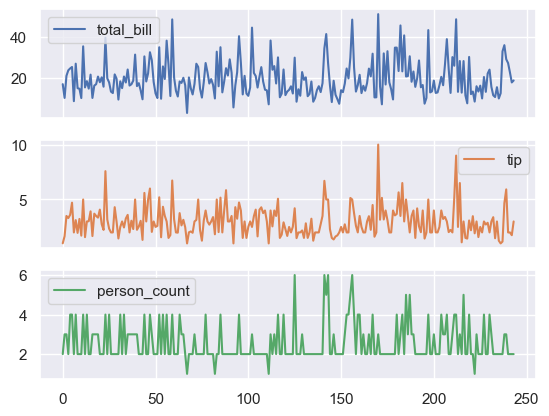

In [9]:
# to see it i use plots.

plt.figure(figsize=(10,10))
tips.plot(subplots=True)

plt.show()

In [10]:
tips.describe()

total_bill         tip  person_count
count  244.000000  244.000000    244.000000
mean    19.785943    2.998279      2.569672
std      8.902412    1.383638      0.951100
min      3.070000    1.000000      1.000000
25%     13.347500    2.000000      2.000000
50%     17.795000    2.900000      2.000000
75%     24.127500    3.562500      3.000000
max     50.810000   10.000000      6.000000

In [11]:
((tips['total_bill'] - tips['total_bill'].mean()) / tips['total_bill'].std()).round(2)

0     -0.31
1     -1.06
2      0.14
3      0.44
4      0.54
       ... 
239    1.04
240    0.83
241    0.32
242   -0.22
243   -0.11
Name: total_bill, Length: 244, dtype: float64

can save it if you want.

### categorical Handling

- **first to deal with your data as catedorical data, shoud convert it.**
**use `astype('category')`**

In [20]:
tips.head()

total_bill   tip     sex smoker  day    time     size  person_count  \
0       16.99  1.01  Female     No  Sun  Dinner      duo             2   
1       10.34  1.66    Male     No  Sun  Dinner  friends             3   
2       21.01  3.50    Male     No  Sun  Dinner  friends             3   
3       23.68  3.31    Male     No  Sun  Dinner      duo             2   
4       24.59  3.61  Female     No  Sun  Dinner   family             4   

  bill_class  
0    C class  
1    D class  
2    C class  
3    C class  
4    C class

In [19]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   total_bill    244 non-null    float64 
 1   tip           244 non-null    float64 
 2   sex           244 non-null    category
 3   smoker        244 non-null    category
 4   day           244 non-null    category
 5   time          244 non-null    category
 6   size          244 non-null    object  
 7   person_count  244 non-null    int64   
 8   bill_class    244 non-null    category
dtypes: category(5), float64(2), int64(1), object(1)
memory usage: 9.7+ KB


In [22]:
# here i dont need to convert , it category

tips['time'].dtype

CategoricalDtype(categories=['Lunch', 'Dinner'], ordered=False, categories_dtype=object)

**there are class in pandas to deal with categorical data.**

using that class can do many, (rename categories)

**label encodeing**
- need it in ML

In [23]:
tips['sex'].cat.codes

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Length: 244, dtype: int8

**one hot encodeing**
- **ML**

In [24]:
pd.get_dummies(tips, columns=['time'], prefix='gg')

total_bill   tip     sex smoker   day     size  person_count bill_class  \
0         16.99  1.01  Female     No   Sun      duo             2    C class   
1         10.34  1.66    Male     No   Sun  friends             3    D class   
2         21.01  3.50    Male     No   Sun  friends             3    C class   
3         23.68  3.31    Male     No   Sun      duo             2    C class   
4         24.59  3.61  Female     No   Sun   family             4    C class   
..          ...   ...     ...    ...   ...      ...           ...        ...   
239       29.03  5.92    Male     No   Sat  friends             3    B class   
240       27.18  2.00  Female    Yes   Sat      duo             2    B class   
241       22.67  2.00    Male    Yes   Sat      duo             2    C class   
242       17.82  1.75    Male     No   Sat      duo             2    C class   
243       18.78  3.00  Female     No  Thur      duo             2    C class   

     gg_Lunch  gg_Dinner  
0       False       True  
1       False       True  
2       False       True  
3       False       True  
4       False       True  
..        ...        ...  
239     False       True  
240     False       True  
241     False       True  
242     False       True  
243     False       True  

[244 rows x 10 columns]

In [25]:
pd.get_dummies(tips, columns=['time'], prefix='gg', dtype=int)

total_bill   tip     sex smoker   day     size  person_count bill_class  \
0         16.99  1.01  Female     No   Sun      duo             2    C class   
1         10.34  1.66    Male     No   Sun  friends             3    D class   
2         21.01  3.50    Male     No   Sun  friends             3    C class   
3         23.68  3.31    Male     No   Sun      duo             2    C class   
4         24.59  3.61  Female     No   Sun   family             4    C class   
..          ...   ...     ...    ...   ...      ...           ...        ...   
239       29.03  5.92    Male     No   Sat  friends             3    B class   
240       27.18  2.00  Female    Yes   Sat      duo             2    B class   
241       22.67  2.00    Male    Yes   Sat      duo             2    C class   
242       17.82  1.75    Male     No   Sat      duo             2    C class   
243       18.78  3.00  Female     No  Thur      duo             2    C class   

     gg_Lunch  gg_Dinner  
0           0          1  
1           0          1  
2           0          1  
3           0          1  
4           0          1  
..        ...        ...  
239         0          1  
240         0          1  
241         0          1  
242         0          1  
243         0          1  

[244 rows x 10 columns]